# The Battle of Neighborhood

# 1. Introduction/Business Problem

New York City, the most populous city in the United States. With an estimated 2018 population of 8,398,748 distributed over about 302.6 square miles (784 km2), New York is also the most densely populated major city in the United States. As one of the most popular cities around the globe. New York city attract tons of tourists annually. There are a different variety of cuisines for the tourists to choose. 

This study is to help some small individual investors who would like to open up pharmacy shop at New York City. We will utilize the data to gather the information to identify which place would be the ideal place for a newly established pharmacy shop. The analysis will also include a bunch of parameters which the investors need to consider for decision-making.

# 2. Data
In this report, we will be using the following data:

New York City data that contains list Boroughs, Neighborhoods along with their latitude and longitude.

Data source : https://cocl.us/new_york_dataset

Description : This data set contains the required information. And we will use this data set to explore various neighborhoods of new york city.

pharmacy shops in each neighborhood of new york city.

Data source : Fousquare API

Description : By using this api we will get all the venues in each neighborhood. We can filter these venues to get only coffee shops.

GeoSpace data

Data source : https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm

Description : By using this geo space data we will get the New york Borough boundaries that will help us visualize choropleth map.

# 3. Methodology

BeautifulSoup to scrape information and parse data from the Wikipedia page, so that I can get an organized table of neighborhoods information of New York City.

In addition, Geopy is used to get the exact geological location of the neighbourhood.

Furthermore, we use Foursqaure API to search venue information of the neighbourhood to gain more understanding of each neighbourhood.

Finally, we use Kmeans to cluster similar neighbourhood to reach our conclusion.

# 4. Analysis

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
# !conda install -c conda-forge folium=0.5.0 --yes
# import folium # map rendering library
from bs4 import BeautifulSoup
import lxml
print('Libraries imported.')

Libraries imported.


In [2]:
url='https://cocl.us/new_york_dataset'
resp=requests.get(url).json()
# all data is present in features label
features=resp['features']

column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
new_york_data = pd.DataFrame(columns=column_names)

for data in features:
    borough = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']

    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]

    new_york_data = new_york_data.append({'Borough': borough,
                                      'Neighborhood': neighborhood_name,
                                      'Latitude': neighborhood_lat,
                                      'Longitude': neighborhood_lon}, ignore_index=True)

In [3]:
new_york_data.head(20)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [4]:
new_york_data.shape

(306, 4)

In [5]:
new_york_data_borough_sum=new_york_data.groupby('Borough').count()
new_york_data_borough_sum

,Neighborhood,Latitude,Longitude
Borough,,,
Bronx,52,52,52
Brooklyn,70,70,70
Manhattan,40,40,40
Queens,81,81,81
Staten Island,63,63,63


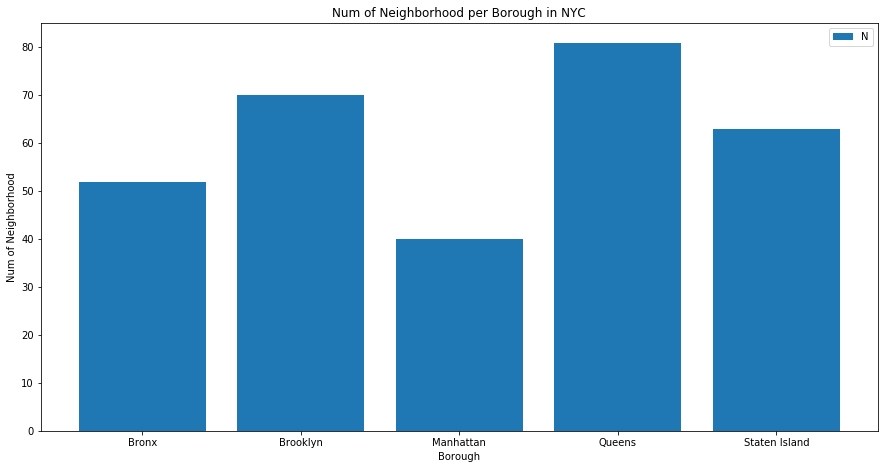

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7.5))
plt.bar(new_york_data_borough_sum.index,new_york_data_borough_sum['Neighborhood'])
plt.title('Num of Neighborhood per Borough in NYC')
plt.xlabel('Borough')
plt.ylabel('Num of Neighborhood')
plt.legend('Neighborhood')
plt.show()

In [9]:
# The code was removed by Watson Studio for sharing.

In [12]:
! pip install Foursquare API

  Stored in directory: /home/dsxuser/.cache/pip/wheels/8e/b3/13/6fb6612d6dd2d4bc2dfa783e9be7554e7c2f276912d3cb850e
Successfully built API


In [53]:
VERSION = '20180604'
LIMIT = 100
radius = 1000

In [20]:
# new_york_data
# Take Wafefiedl as example
neighborhood_latitude=new_york_data.loc[0,'Latitude']
neighborhood_longitude=new_york_data.loc[0,'Longitude']

In [54]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()

In [55]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)

In [56]:
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Lollipops Gelato,"[{'id': '4bf58dd8d48988d1d0941735', 'name': 'D...",40.894123,-73.845892
1,Ripe Kitchen & Bar,"[{'id': '4bf58dd8d48988d144941735', 'name': 'C...",40.898152,-73.838875
2,Ali's Roti Shop,"[{'id': '4bf58dd8d48988d144941735', 'name': 'C...",40.894036,-73.856935
3,Carvel Ice Cream,"[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",40.890487,-73.848568
4,Jimbo's,"[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",40.891740,-73.858226
5,Rite Aid,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",40.896649,-73.844846
6,Jackie's West Indian Bakery,"[{'id': '4bf58dd8d48988d144941735', 'name': 'C...",40.889283,-73.843310
7,Walgreens,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",40.896687,-73.844850
8,Dunkin',"[{'id': '4bf58dd8d48988d148941735', 'name': 'D...",40.890459,-73.849089
9,Rite Aid,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",40.889062,-73.842993


In [57]:
nearby_venues.loc[0,'venue.categories']

[{'id': '4bf58dd8d48988d1d0941735',
  'name': 'Dessert Shop',
  'pluralName': 'Dessert Shops',
  'shortName': 'Desserts',
  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/dessert_',
   'suffix': '.png'},
  'primary': True}]

In [58]:
nearby_venues_modified=nearby_venues.copy()

In [63]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [64]:
# filter the category for each row
nearby_venues_modified['venue.categories'] = nearby_venues_modified.apply(get_category_type, axis=1)

In [65]:
nearby_venues_modified.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Lollipops Gelato,Dessert Shop,40.894123,-73.845892
1,Ripe Kitchen & Bar,Caribbean Restaurant,40.898152,-73.838875
2,Ali's Roti Shop,Caribbean Restaurant,40.894036,-73.856935
3,Carvel Ice Cream,Ice Cream Shop,40.890487,-73.848568
4,Jimbo's,Burger Joint,40.891740,-73.858226


In [69]:
nearby_venues_modified.groupby('venue.categories').count()

,venue.name,venue.location.lat,venue.location.lng
venue.categories,,,
Asian Restaurant,1,1,1
Bakery,1,1,1
Bank,2,2,2
Burger Joint,1,1,1
Bus Station,3,3,3
Caribbean Restaurant,4,4,4
Check Cashing Service,1,1,1
Chinese Restaurant,2,2,2
Convenience Store,1,1,1


In [71]:
(nearby_venues_modified['venue.categories']=='Pharmacy').sum()

6

In [85]:
# above is a test
# let's randomly compare 30 neighbourhood
import random
randomlist = []
for i in range(0,30):
    n = random.randint(0,306)
    randomlist.append(n)
print(randomlist)

[85, 295, 238, 246, 270, 22, 150, 296, 251, 262, 11, 120, 73, 194, 107, 91, 239, 180, 13, 182, 175, 200, 9, 67, 244, 138, 230, 239, 62, 246]


In [89]:
new_york_data_30_neighbourhood=new_york_data.copy()

In [91]:
new_york_data_30_neighbourhood=new_york_data_30_neighbourhood.iloc[randomlist]

In [92]:
new_york_data_30_neighbourhood

,Borough,Neighborhood,Latitude,Longitude
85,Brooklyn,Sea Gate,40.576375,-74.007873
295,Brooklyn,Highland Park,40.681999,-73.890346
238,Staten Island,Butler Manor,40.506082,-74.229504
246,Staten Island,Bulls Head,40.609592,-74.159409
270,Bronx,Mount Hope,40.848842,-73.908299
22,Bronx,Port Morris,40.801664,-73.913221
150,Queens,Whitestone,40.781291,-73.814202
296,Brooklyn,Madison,40.609378,-73.948415
251,Staten Island,Richmond Town,40.569606,-74.134057
262,Brooklyn,Mill Basin,40.615974,-73.915154


In [105]:
new_york_data_30_neighbourhood.values.tolist()[0]

['Brooklyn', 'Sea Gate', 40.57637537890224, -74.0078731120024, 2]

In [109]:
Countlist=[]
for i in range(30): 
    Borough=new_york_data_30_neighbourhood.values.tolist()[i][0]
    Neighborhood=new_york_data_30_neighbourhood.values.tolist()[i][1]
    neighborhood_latitude=new_york_data_30_neighbourhood.values.tolist()[i][2]
    neighborhood_longitude=new_york_data_30_neighbourhood.values.tolist()[i][3]
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        neighborhood_latitude, 
        neighborhood_longitude, 
        radius, 
        LIMIT)
    results = requests.get(url).json()
    venues = results['response']['groups'][0]['items']
    nearby_venues = json_normalize(venues)
    # filter columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    nearby_venues =nearby_venues.loc[:, filtered_columns]
    nearby_venues
    nearby_venues_modified=nearby_venues.copy()
    nearby_venues_modified['venue.categories'] = nearby_venues_modified.apply(get_category_type, axis=1)
    Countlist.append((nearby_venues_modified['venue.categories']=='Pharmacy').sum())
new_york_data_30_neighbourhood['Pharmacy No'] = Countlist
new_york_data_30_neighbourhood

,Borough,Neighborhood,Latitude,Longitude,Pharmacy No
85,Brooklyn,Sea Gate,40.576375,-74.007873,2
295,Brooklyn,Highland Park,40.681999,-73.890346,0
238,Staten Island,Butler Manor,40.506082,-74.229504,0
246,Staten Island,Bulls Head,40.609592,-74.159409,2
270,Bronx,Mount Hope,40.848842,-73.908299,4
22,Bronx,Port Morris,40.801664,-73.913221,1
150,Queens,Whitestone,40.781291,-73.814202,2
296,Brooklyn,Madison,40.609378,-73.948415,4
251,Staten Island,Richmond Town,40.569606,-74.134057,1
262,Brooklyn,Mill Basin,40.615974,-73.915154,3


In [110]:
new_york_data_30_neighbourhood.sort_values('Pharmacy No',ascending=False)

,Borough,Neighborhood,Latitude,Longitude,Pharmacy No
270,Bronx,Mount Hope,40.848842,-73.908299,4
296,Brooklyn,Madison,40.609378,-73.948415,4
9,Bronx,Williamsbridge,40.881039,-73.857446,3
73,Brooklyn,Starrett City,40.647589,-73.879370,3
262,Brooklyn,Mill Basin,40.615974,-73.915154,3
85,Brooklyn,Sea Gate,40.576375,-74.007873,2
11,Bronx,Pelham Parkway,40.857413,-73.854756,2
230,Staten Island,Old Town,40.596329,-74.087511,2
13,Bronx,Bedford Park,40.870185,-73.885512,2
194,Queens,Bellaire,40.733014,-73.738892,2


In [112]:
new_york_data_30_neighbourhood.groupby('Borough').sum()

,Latitude,Longitude,Pharmacy No
Borough,,,
Bronx,204.259143,-369.419235,12
Brooklyn,325.120834,-591.477731,12
Manhattan,81.497161,-147.971191,0
Queens,244.546685,-442.741574,6
Staten Island,365.162294,-667.493572,8


In [144]:
new_york_data_30_neighbourhood.groupby('Borough').mean()

,Latitude,Longitude,Pharmacy No
Borough,,,
Bronx,40.851829,-73.883847,2.400000
Brooklyn,40.640104,-73.934716,1.500000
Manhattan,40.748580,-73.985595,0.000000
Queens,40.757781,-73.790262,1.000000
Staten Island,40.573588,-74.165952,0.888889


## We can see that Bronx and Brooklyn has the highest number of pharmacy shops in a sample of 30 random neighbourhoods
## They might be a good choice
## Now, let's locate sample districts on the map to have a visual

In [113]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium
print('Folium installed and imported!')
from folium import plugins
!wget --quiet https://cocl.us/sanfran_geojson -O world_countries.json

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.0.1               |             py_0         575 KB  conda-forge
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    openssl-1.1.1e             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                       

In [116]:
map_new_york_city = folium.Map(location=[40.84, -73.90], zoom_start=10)

# add markers to map
for lat, lng, borough, Neighbourhood in zip(new_york_data_30_neighbourhood['Latitude'], new_york_data_30_neighbourhood['Longitude'], new_york_data_30_neighbourhood['Borough'], new_york_data_30_neighbourhood['Neighborhood']):
    label = '{}, {}'.format(Neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_new_york_city)  
    
map_new_york_city 

# Let's plot the data according to geographic location

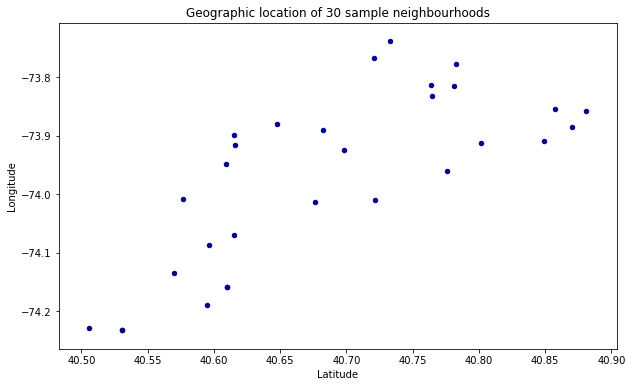

In [118]:
new_york_data_30_neighbourhood.plot(kind='scatter', x='Latitude', y='Longitude', figsize=(10, 6), color='darkblue')

plt.title('Geographic location of 30 sample neighbourhoods')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.show()

# Let's try to cluster the data by geographic location

In [128]:
# we will modify the dataframe first
new_york_data_30_neighbourhood=new_york_data_30_neighbourhood.set_index('Neighborhood')

,Borough,Latitude,Longitude,Pharmacy No
Neighborhood,,,,
Sea Gate,Brooklyn,40.576375,-74.007873,2
Highland Park,Brooklyn,40.681999,-73.890346,0
Butler Manor,Staten Island,40.506082,-74.229504,0
Bulls Head,Staten Island,40.609592,-74.159409,2
Mount Hope,Bronx,40.848842,-73.908299,4
Port Morris,Bronx,40.801664,-73.913221,1
Whitestone,Queens,40.781291,-73.814202,2
Madison,Brooklyn,40.609378,-73.948415,4
Richmond Town,Staten Island,40.569606,-74.134057,1


In [131]:
new_york_data_30_neighbourhood_modified=new_york_data_30_neighbourhood.copy()
new_york_data_30_neighbourhood_modified=new_york_data_30_neighbourhood_modified[['Latitude','Longitude']]

In [132]:
new_york_data_30_neighbourhood_modified

,Latitude,Longitude
Neighborhood,,
Sea Gate,40.576375,-74.007873
Highland Park,40.681999,-73.890346
Butler Manor,40.506082,-74.229504
Bulls Head,40.609592,-74.159409
Mount Hope,40.848842,-73.908299
Port Morris,40.801664,-73.913221
Whitestone,40.781291,-73.814202
Madison,40.609378,-73.948415
Richmond Town,40.569606,-74.134057


In [133]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(new_york_data_30_neighbourhood_modified)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [134]:
labels = kmeans.predict(new_york_data_30_neighbourhood_modified)
centroids = kmeans.cluster_centers_

In [138]:
print("Labels for data points are:")
print(labels)

print("The centroids for the 3 clusters are:") 
print(centroids)  

Labels for data points are:
[2 2 0 0 1 1 1 2 0 2 1 2 2 1 2 2 0 1 1 1 1 0 1 2 0 1 0 0 2 0]
The centroids for the 3 clusters are:
[[ 40.57358823 -74.16595247]
 [ 40.80052981 -73.83280079]
 [ 40.66179947 -73.94489218]]


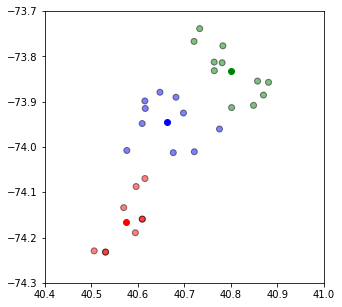

In [145]:
fig = plt.figure(figsize=(5, 5))
# colmap = {1: 'r', 2: 'g', 3: 'b'}
colors = list(map(lambda x: colmap[x+1], labels))

plt.scatter(new_york_data_30_neighbourhood_modified['Latitude'], new_york_data_30_neighbourhood_modified['Longitude'], color=colors, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(40.4, 41)
plt.ylim(-74.3, -73.7)
plt.show()

### We successfully clustered 30 sample locations into 3 groups

### We have found that Bronx is the ideal place for opening a pharmacy shop.

# limits
### Kmeans needs to have pre-specified clusters, which is ussally not the case.